In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm.jetscapeml_source')
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')
    sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source')
load_namespace()


In [2]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
simulation_name="alpha_s_test_net_5_fold_1_epoch_dataset_size_1k"

config=Config(simulation_name=simulation_name)
# print(config)

2024-08-20 21:28:54.072559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 21:28:54.163370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 21:28:54.190041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 21:28:54.370299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 21:28:57.348935: W tensorflow/compiler/tf2

Directory /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/data/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k created.
Directory /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k created.
Directory /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/reports/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k created.
Directory /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/reports/figures/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k created.


In [3]:
import jet_ml.classifiers.alpha_s.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_alpha_s(1000)
# pred.get_preprocess_dataset_info(x,y)
y_classes=y_df.columns
y=y_df.values
display(y_classes)
display(y)

Dataset Preprocessor
Aggregatring all parameters values
label_items:
 {'eloss_items': ['MMAT', 'MLBT'], 'alpha_s_items': [0.2, 0.3, 0.4], 'q0_items': [1.5, 2.0, 2.5]}
Building required params for the loading the dataset file
labels_str:
 {'eloss_items_str': 'MMAT_MLBT', 'alpha_s_items_str': '0.2_0.3_0.4', 'q0_items_str': '1.5_2.0_2.5'}
Loading the whole dataset
Extract the working column#1 for classification
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 1000 (1000,)


Index(['0.2', '0.3', '0.4'], dtype='object')

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
k_fold=StratifiedKFold(5,shuffle=False)

out_of_sample_y=[]
out_of_sample_pred=[]
fold=0

#Must specify y StratifiedKFold for classification
for train,test in k_fold.split(x,y_raw):
    fold+=1
    print(f"Fold #{fold}")

    x_train=x[train]
    y_train=y[train]
    x_test=x[test]
    y_test=y[test]

    import jet_ml.models.test_net as test_net
    input_shape=x[0].shape
    output_shape=y.shape[1]
    activation='softmax'
    model=test_net.build_model(input_shape,output_shape,activation)
    model=test_net.compile_model(model)
    # model.summary()


    batch_size=128
    epochs=1
    monitor='val_loss' #'val_accuracy' or 'val_loss'
    model, history=test_net.train_model(model,
                                        x_train,y_train, x_test,y_test, 
                                        epochs, batch_size, monitor,
                                        )
    
    from jet_ml.evaluation import get_accuracy
    pred, score=get_accuracy(model,x_test=x_test,y_test=y_test)
    out_of_sample_y.append(y_test)
    out_of_sample_pred.append(pred)
    print(f"Fold score (accuracy): {score}")

# Build the oos prediction list and calculate the error.
out_of_sample_y=np.concatenate(out_of_sample_y)
out_of_sample_pred=np.concatenate(out_of_sample_pred)

out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation

Fold #1


/home/arsi/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724203742.176676    4384 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724203742.447652    4384 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724203742.448305    4384 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724203742.456073    4


Epoch 1: val_loss improved from inf to 1.09855, saving model to /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 13s - 2s/step - accuracy: 0.3375 - loss: 1.0994 - val_accuracy: 0.3750 - val_loss: 1.0985
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:12
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
Fold score (accuracy): 0.375
Fold #2


/home/arsi/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09850, saving model to /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 9s - 1s/step - accuracy: 0.3175 - loss: 1.0996 - val_accuracy: 0.3400 - val_loss: 1.0985
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:08
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fold score (accuracy): 0.34
Fold #3


/home/arsi/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09651, saving model to /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 6s - 914ms/step - accuracy: 0.3275 - loss: 1.0996 - val_accuracy: 0.3800 - val_loss: 1.0965
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:06
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Fold score (accuracy): 0.38
Fold #4


/home/arsi/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09757, saving model to /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 7s - 931ms/step - accuracy: 0.2975 - loss: 1.0998 - val_accuracy: 0.3550 - val_loss: 1.0976
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:06
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Fold score (accuracy): 0.355
Fold #5


/home/arsi/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.09792, saving model to /mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source/models/alpha_s_test_net_5_fold_1_epoch_dataset_size_1k/testnet/model.keras
7/7 - 6s - 838ms/step - accuracy: 0.3275 - loss: 1.1009 - val_accuracy: 0.3150 - val_loss: 1.0979
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:00:05
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fold score (accuracy): 0.315


In [5]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

0.353

In [6]:
from jet_ml.evaluation import store_out_of_sample_y_and_predictions
store_out_of_sample_y_and_predictions(y_df,out_of_sample_y,out_of_sample_pred,y_classes)

3
['OoS_0.2', 'OoS_0.3', 'OoS_0.4']


Confusion matrix, without normalization
[[132 157  45]
 [101 174  59]
 [ 96 189  47]]
Normalized confusion matrix
[[0.4  0.47 0.13]
 [0.3  0.52 0.18]
 [0.29 0.57 0.14]]


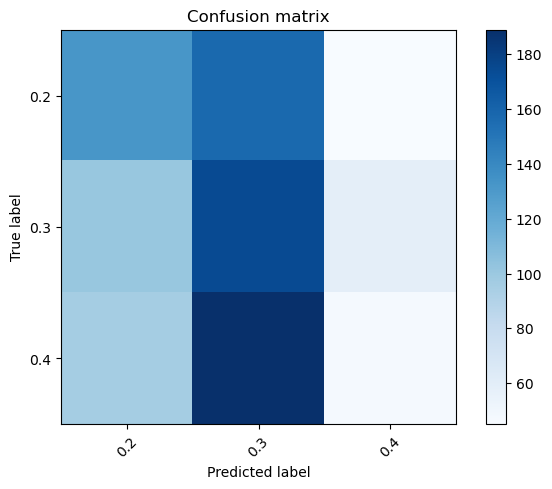

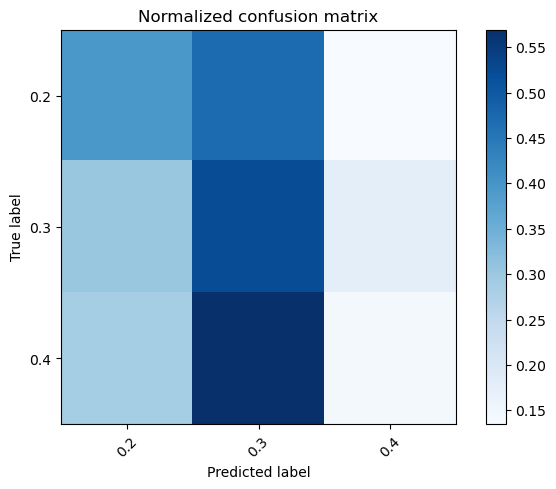

In [7]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)